<a href="https://colab.research.google.com/github/SAISKAND/Python-projects/blob/main/ML_Algorithms_scratch/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

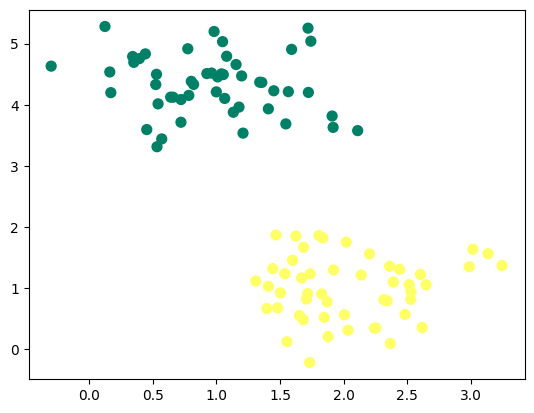

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plt.show()

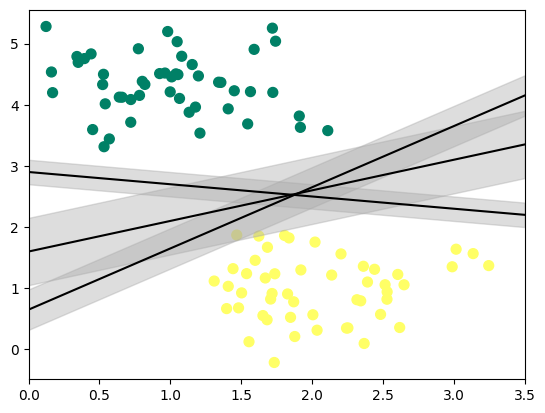

In [ ]:
xfit = np.linspace(0, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'summer')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
   yfit = m * xfit + b
   plt.plot(xfit, yfit, '-k')
   plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
   color = '#AAAAAA', alpha = 0.4)
plt.xlim(0, 3.5);

In [ ]:

# Generate toy dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.50)

# Define SVM class
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

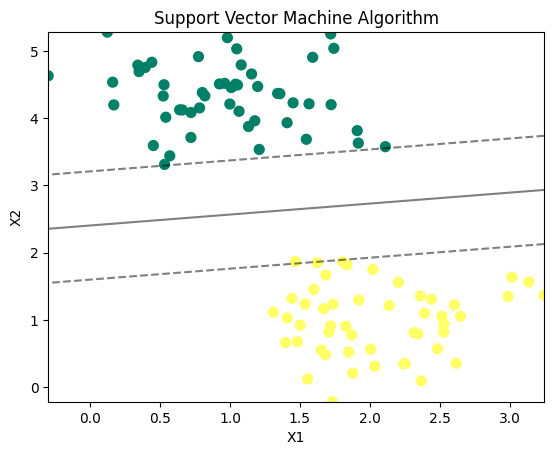

In [ ]:
# Create and fit SVM model
svm = SVM()
svm.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')

# Plot the hyperplane (decision boundary)
w = svm.w
b = svm.b

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

xx = np.linspace(x_min, x_max)
yy = np.linspace(y_min, y_max)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = np.dot(xy, w) - b
Z = Z.reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Support Vector Machine Algorithm')
plt.show()